### Load libraries

In [ ]:

import sys
sys.path.insert(0, '../scripts/')
from load_modify_sample_utils import load_model, get_objective_functions, get_reaction_bounds, modify_model
from load_modify_sample_utils import sample_dingo, sample_optgp
from correlations_utils import correlated_reactions, split_forward_reverse


/home/touliopoulos/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/touliopoulos/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/touliopoulos/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Load model

In [2]:
ec_cobra_model, ec_cobra_reactions, ec_dingo_model, ec_dingo_reactions = load_model("../ext_data/models/e_coli_core.xml")

objective_functions = get_objective_functions(ec_cobra_model)
print(objective_functions)

default_reaction_bounds = get_reaction_bounds(ec_cobra_model)
print(default_reaction_bounds)

Set parameter Username
Set parameter LicenseID to value 2642044
Academic license - for non-commercial use only - expires 2026-03-25
['BIOMASS_Ecoli_core_w_GAM']
{'PFK': (0.0, 1000.0), 'PFL': (0.0, 1000.0), 'PGI': (-1000.0, 1000.0), 'PGK': (-1000.0, 1000.0), 'PGL': (0.0, 1000.0), 'ACALD': (-1000.0, 1000.0), 'AKGt2r': (-1000.0, 1000.0), 'PGM': (-1000.0, 1000.0), 'PIt2r': (-1000.0, 1000.0), 'ALCD2x': (-1000.0, 1000.0), 'ACALDt': (-1000.0, 1000.0), 'ACKr': (-1000.0, 1000.0), 'PPC': (0.0, 1000.0), 'ACONTa': (-1000.0, 1000.0), 'ACONTb': (-1000.0, 1000.0), 'ATPM': (8.39, 1000.0), 'PPCK': (0.0, 1000.0), 'ACt2r': (-1000.0, 1000.0), 'PPS': (0.0, 1000.0), 'ADK1': (-1000.0, 1000.0), 'AKGDH': (0.0, 1000.0), 'ATPS4r': (-1000.0, 1000.0), 'PTAr': (-1000.0, 1000.0), 'PYK': (0.0, 1000.0), 'BIOMASS_Ecoli_core_w_GAM': (0.0, 1000.0), 'PYRt2': (-1000.0, 1000.0), 'CO2t': (-1000.0, 1000.0), 'RPE': (-1000.0, 1000.0), 'CS': (0.0, 1000.0), 'RPI': (-1000.0, 1000.0), 'SUCCt2_2': (0.0, 1000.0), 'CYTBD': (0.0, 1000.

### Perform sampling

In [3]:
ec_cobra_model_condition_1, ec_dingo_model_condition_1 = modify_model(ec_cobra_model, objective_function="BIOMASS_Ecoli_core_w_GAM", optimal_percentage=100)
ec_cobra_model_condition_2, ec_dingo_model_condition_2 = modify_model(ec_cobra_model, objective_function="BIOMASS_Ecoli_core_w_GAM", optimal_percentage=0)


samples_optgp_condition_1 = sample_optgp(ec_cobra_model_condition_1, n_samples = 3000, thinning=100, reaction_in_rows = True)
samples_optgp_condition_2 = sample_optgp(ec_cobra_model_condition_2, n_samples = 3000, thinning=100, reaction_in_rows = True)

Read LP format model from file /tmp/tmp714vs5na.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmphva9gzq1.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpudpi9ggl.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpfb3su2cz.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


### Split steady states to forward and reverse

In [4]:

extended_steady_states_condition_1, extended_reactions_conditions_1 = split_forward_reverse(samples_optgp_condition_1, reactions=ec_dingo_reactions)

extended_steady_states_condition_2, extended_reactions_conditions_2 = split_forward_reverse(samples_optgp_condition_2, reactions=ec_dingo_reactions)


### Calculate the pairwise correlation matrix

In [5]:


(linear_correlation_matrix_1, 
non_linear_correlation_matrix_1, 
mixed_correlation_matrix_1, 
correlations_dictionary_1) = correlated_reactions(
        steady_states = extended_steady_states_condition_1,
        boolean_sharing_metabolites_matrix=None,
        reactions=extended_reactions_conditions_1, 
        linear_corr_cutoff = 0.3, 
        indicator_cutoff = 1.2,
        jensenshannon_cutoff = 0.1,
        std_cutoff= 1e-2,
        include_non_linear = True, 
        cells = 4, 
        cop_coeff = 0.2, 
        lower_triangle = False, 
        verbose = True)


/home/touliopoulos/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/touliopoulos/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Completed the process of 345 from 6070 copulas
Completed the process of 378 from 6070 copulas
Completed the process of 380 from 6070 copulas
Completed the process of 381 from 6070 copulas
Completed the process of 382 from 6070 copulas
Completed the process of 383 from 6070 copulas
Completed the process of 388 from 6070 copulas
Completed the process of 389 from 6070 copulas
Completed the process of 397 from 6070 copulas
Completed the process of 398 from 6070 copulas
Completed the process of 405 from 6070 copulas
Completed the process of 585 from 6070 copulas
Completed the process of 610 from 6070 copulas
Completed the process of 635 from 6070 copulas
Completed the process of 660 from 6070 copulas
Completed the process of 666 from 6070 copulas
Completed the process of 668 from 6070 copulas
Completed the process of 669 from 6070 copulas
Completed the process of 670 from 6070 copulas
Completed the process of 671 from 6070 copulas
Completed the process of 676 from 6070 copulas
Completed the

# Perform clustering of the correlation matrix

In [ ]:

from dingo.utils import cluster_corr_reactions
from dingo.illustrations import plot_dendrogram


dissimilarity_matrix, labels, clusters = cluster_corr_reactions(linear_correlation_matrix_1, 
                                                                reactions=extended_reactions_conditions_1, 
                                                                linkage="ward", 
                                                                t = 4.0, 
                                                                correction=False)

print(clusters)
plot_dendrogram(dissimilarity_matrix, extended_reactions_conditions_1, plot_labels = True, t = 2, linkage = "ward")


### See if with the mixed matrix I get better cluster


dissimilarity_matrix_mixed, labels_mixed, clusters_mixed = cluster_corr_reactions(mixed_correlation_matrix_1, 
                                                                reactions=extended_reactions_conditions_1, 
                                                                linkage="ward", 
                                                                t = 4.0, 
                                                                correction=False)

print(clusters_mixed)
plot_dendrogram(dissimilarity_matrix_mixed, extended_reactions_conditions_1, plot_labels = True, t = 2, linkage = "ward")


[['PPC', 'AKGDH', 'SUCOAS_rev', 'ICDHyr'], ['PFK', 'PGI', 'PGK_rev', 'PGM_rev', 'ACONTa', 'ACONTb', 'CS', 'RPI', 'ENO', 'THD2', 'TPI', 'FBA', 'FUM', 'GAPD'], ['PGK', 'PGL', 'PGM', 'RPE', 'RPI_rev', 'TALA', 'TKT1', 'TKT2', 'G6PDH2r', 'GND'], ['ATPS4r', 'NADH16', 'NADTRHD'], ['PYK', 'MDH', 'PDH'], ['SUCOAS', 'ICL', 'MALS'], ['CO2t_rev', 'CYTBD', 'EX_co2_e', 'EX_h2o_e', 'EX_o2_e_rev', 'H2Ot_rev', 'O2t'], ['ACKr_rev', 'ACt2r_rev', 'PTAr', 'EX_ac_e'], ['PFL', 'CO2t', 'EX_for_e', 'EX_h_e', 'EX_o2_e', 'H2Ot'], ['EX_glu__L_e', 'EX_nh4_e_rev', 'GLUDy_rev', 'GLUt2r_rev', 'NH4t'], ['ALCD2x_rev', 'ETOHt2r_rev', 'EX_etoh_e'], ['ACALD_rev', 'ACALDt_rev', 'EX_acald_e'], ['EX_nh4_e', 'GLUDy', 'GLUt2r'], ['PIt2r', 'BIOMASS_Ecoli_core_w_GAM', 'EX_pi_e_rev', 'GLNS'], ['D_LACt2_rev', 'EX_lac__D_e', 'LDH_D_rev'], ['ACALD', 'ALCD2x', 'ACALDt', 'ETOHt2r'], ['ACKr', 'ACt2r'], ['D_LACt2', 'LDH_D'], ['AKGt2r_rev', 'AKGt2r', 'ATPM', 'PPCK', 'PPS', 'ADK1', 'PYRt2_rev', 'PYRt2', 'SUCCt2_2', 'SUCCt3', 'SUCDi', 'EX_

/home/touliopoulos/.local/lib/python3.10/site-packages/dingo/utils.py:381: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dissimilarity_matrix, linkage)


[['PPC', 'AKGDH', 'SUCOAS_rev', 'ICDHyr'], ['PFK', 'PGI', 'PGK_rev', 'PGM_rev', 'ACONTa', 'ACONTb', 'CS', 'RPI', 'ENO', 'THD2', 'TPI', 'FBA', 'FUM', 'GAPD'], ['PGK', 'PGL', 'PGM', 'RPE', 'RPI_rev', 'TALA', 'TKT1', 'TKT2', 'G6PDH2r', 'GND'], ['ATPS4r', 'NADH16', 'NADTRHD'], ['PYK', 'MDH', 'PDH'], ['SUCOAS', 'ICL', 'MALS'], ['CO2t_rev', 'CYTBD', 'EX_co2_e', 'EX_h2o_e', 'EX_o2_e_rev', 'H2Ot_rev', 'O2t'], ['ACKr_rev', 'ACt2r_rev', 'PTAr', 'EX_ac_e'], ['PFL', 'CO2t', 'EX_for_e', 'EX_h_e', 'EX_o2_e', 'H2Ot'], ['EX_glu__L_e', 'EX_nh4_e_rev', 'GLUDy_rev', 'GLUt2r_rev', 'NH4t'], ['ALCD2x_rev', 'ETOHt2r_rev', 'EX_etoh_e'], ['ACALD_rev', 'ACALDt_rev', 'EX_acald_e'], ['EX_nh4_e', 'GLUDy', 'GLUt2r'], ['PIt2r', 'BIOMASS_Ecoli_core_w_GAM', 'EX_pi_e_rev', 'GLNS'], ['D_LACt2_rev', 'EX_lac__D_e', 'LDH_D_rev'], ['ACALD', 'ALCD2x', 'ACALDt', 'ETOHt2r'], ['ACKr', 'ACt2r'], ['D_LACt2', 'LDH_D'], ['AKGt2r_rev', 'AKGt2r', 'ATPM', 'PPCK', 'PPS', 'ADK1', 'PYRt2_rev', 'PYRt2', 'SUCCt2_2', 'SUCCt3', 'SUCDi', 'EX_

/home/touliopoulos/.local/lib/python3.10/site-packages/dingo/utils.py:381: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



### Map Model reaction ID to KEGG ID and corresonding KEGG pathway

In [7]:


def get_kegg_identifiers(model):
    return (
        {met.id: met.annotation.get("kegg.compound") for met in model.metabolites},
        {reac.id: reac.annotation.get("kegg.reaction") for reac in model.reactions},
    )


dictionary = get_kegg_identifiers(ec_cobra_model)
print(dictionary[1])



from bioservices import KEGG

kegg = KEGG()
model_to_kegg = dictionary[1]

reaction_to_pathways = {}

for model_rxn, kegg_rxn in model_to_kegg.items():
    if kegg_rxn:
        try:
            entry = kegg.get(kegg_rxn)
            parsed = kegg.parse(entry)
            pathways = parsed.get('PATHWAY', {})
            reaction_to_pathways[model_rxn] = list(pathways.values())
        except Exception as e:
            print(f"Error retrieving {kegg_rxn}: {e}")
            reaction_to_pathways[model_rxn] = []

# Print or save the mappings
import pandas as pd
df = pd.DataFrame([
    {'model_reaction': rxn, 'kegg_reaction': model_to_kegg[rxn], 'pathways': paths}
    for rxn, paths in reaction_to_pathways.items()
])



{'PFK': None, 'PFL': 'R00212', 'PGI': None, 'PGK': 'R01512', 'PGL': 'R02035', 'ACALD': 'R00228', 'AKGt2r': None, 'PGM': 'R01518', 'PIt2r': None, 'ALCD2x': 'R00754', 'ACALDt': None, 'ACKr': 'R00315', 'PPC': 'R00345', 'ACONTa': 'R01325', 'ACONTb': 'R01900', 'ATPM': 'R00086', 'PPCK': 'R00341', 'ACt2r': None, 'PPS': 'R00199', 'ADK1': 'R00127', 'AKGDH': 'R08549', 'ATPS4r': None, 'PTAr': 'R00230', 'PYK': 'R00200', 'BIOMASS_Ecoli_core_w_GAM': None, 'PYRt2': None, 'CO2t': None, 'RPE': 'R01529', 'CS': 'R00351', 'RPI': None, 'SUCCt2_2': None, 'CYTBD': None, 'D_LACt2': None, 'ENO': 'R00658', 'SUCCt3': None, 'ETOHt2r': None, 'SUCDi': None, 'SUCOAS': 'R00405', 'TALA': 'R01827', 'THD2': None, 'TKT1': None, 'TKT2': 'R01830', 'TPI': 'R01015', 'EX_ac_e': None, 'EX_acald_e': None, 'EX_akg_e': None, 'EX_co2_e': None, 'EX_etoh_e': None, 'EX_for_e': None, 'EX_fru_e': None, 'EX_fum_e': None, 'EX_glc__D_e': None, 'EX_gln__L_e': None, 'EX_glu__L_e': None, 'EX_h_e': None, 'EX_h2o_e': None, 'EX_lac__D_e': None,

In [8]:

pd.set_option('display.max_columns', None)      # Show all columns
pd.set_option('display.width', 0)               # Don't wrap columns
pd.set_option('display.max_colwidth', None)     # Don't truncate column contents

df.head(45)

,model_reaction,kegg_reaction,pathways
0,PFL,R00212,"[Pyruvate metabolism, Butanoate metabolism, Metabolic pathways, Microbial metabolism in diverse environments]"
1,PGK,R01512,"[Glycolysis / Gluconeogenesis, Carbon fixation by Calvin cycle, Metabolic pathways, Biosynthesis of secondary metabolites, Microbial metabolism in diverse environments, Carbon metabolism, Biosynthesis of amino acids]"
2,PGL,R02035,"[Pentose phosphate pathway, Metabolic pathways, Biosynthesis of secondary metabolites, Microbial metabolism in diverse environments, Carbon metabolism]"
3,ACALD,R00228,"[Phenylalanine metabolism, Benzoate degradation, Pyruvate metabolism, Dioxin degradation, Xylene degradation, Metabolic pathways, Microbial metabolism in diverse environments, Degradation of aromatic compounds]"
4,PGM,R01518,"[Glycolysis / Gluconeogenesis, Glycine, serine and threonine metabolism, Methane metabolism, Metabolic pathways, Biosynthesis of secondary metabolites, Microbial metabolism in diverse environments, Carbon metabolism, Biosynthesis of amino acids]"
5,ALCD2x,R00754,"[Glycolysis / Gluconeogenesis, Pyruvate metabolism, Metabolic pathways, Biosynthesis of secondary metabolites, Microbial metabolism in diverse environments]"
6,ACKr,R00315,"[Taurine and hypotaurine metabolism, Pyruvate metabolism, Methane metabolism, Other carbon fixation pathways, Metabolic pathways, Microbial metabolism in diverse environments, Carbon metabolism]"
7,PPC,R00345,"[Pyruvate metabolism, Methane metabolism, Carbon fixation by Calvin cycle, Other carbon fixation pathways, Metabolic pathways, Microbial metabolism in diverse environments, Carbon metabolism]"
8,ACONTa,R01325,"[Citrate cycle (TCA cycle), Glyoxylate and dicarboxylate metabolism, Other carbon fixation pathways, Metabolic pathways, Biosynthesis of secondary metabolites, Microbial metabolism in diverse environments, 2-Oxocarboxylic acid metabolism]"
9,ACONTb,R01900,"[Citrate cycle (TCA cycle), Glyoxylate and dicarboxylate metabolism, Other carbon fixation pathways, Metabolic pathways, Biosynthesis of secondary metabolites, Microbial metabolism in diverse environments, 2-Oxocarboxylic acid metabolism]"


### Create a df with percentages of pathways per clusters

In [9]:
from collections import Counter, defaultdict


# Create a mapping from reaction to pathways
reaction_to_pathways = df.set_index("model_reaction")["pathways"].to_dict()

# Compute pathway percentages per cluster
cluster_pathway_percentages = []

for cluster_id, reactions in enumerate(clusters):
    pathway_counter = Counter()
    total_reactions_with_pathways = 0

    for rxn in reactions:
        pathways = reaction_to_pathways.get(rxn, [])
        if pathways:
            total_reactions_with_pathways += 1
            pathway_counter.update(pathways)

    # Convert to percentage
    cluster_result = {
        "Cluster": cluster_id,
        "Total_Reactions": len(reactions),
        "Mapped_Reactions": total_reactions_with_pathways,
    }

    for pathway, count in pathway_counter.items():
        percentage = (count / total_reactions_with_pathways) * 100 if total_reactions_with_pathways > 0 else 0
        cluster_result[pathway] = round(percentage, 2)

    cluster_pathway_percentages.append(cluster_result)

# Convert to DataFrame
pathway_df = pd.DataFrame(cluster_pathway_percentages).fillna(0)


In [13]:


pathway_df = pathway_df.drop('Metabolic pathways', axis=1)
print(pathway_df)



    Cluster  Total_Reactions  Mapped_Reactions  Pyruvate metabolism  \
0         0                4                 3                33.33   
1         1               14                 8                12.50   
2         2               10                 5                 0.00   
3         3                3                 1                 0.00   
4         4                3                 3                66.67   
5         5                3                 3                33.33   
6         6                7                 0                 0.00   
7         7                4                 1               100.00   
8         8                6                 1               100.00   
9         9                5                 0                 0.00   
10       10                3                 0                 0.00   
11       11                3                 0                 0.00   
12       12                3                 1                 0.00   
13    

### Identify most abundant (representative?) pathway per cluster

[{'Pyruvate metabolism': 5.263157894736842, 'Methane metabolism': 5.263157894736842, 'Carbon fixation by Calvin cycle': 5.263157894736842, 'Other carbon fixation pathways': 10.526315789473683, 'Metabolic pathways': 15.789473684210526, 'Microbial metabolism in diverse environments': 15.789473684210526, 'Carbon metabolism': 15.789473684210526, 'Biosynthesis of secondary metabolites': 5.263157894736842, '2-Oxocarboxylic acid metabolism': 10.526315789473683, 'Glutathione metabolism': 5.263157894736842, 'Biosynthesis of amino acids': 5.263157894736842}, {'Citrate cycle (TCA cycle)': 6.451612903225806, 'Glyoxylate and dicarboxylate metabolism': 4.838709677419355, 'Other carbon fixation pathways': 4.838709677419355, 'Metabolic pathways': 12.903225806451612, 'Biosynthesis of secondary metabolites': 12.903225806451612, 'Microbial metabolism in diverse environments': 12.903225806451612, '2-Oxocarboxylic acid metabolism': 4.838709677419355, 'Carbon metabolism': 9.67741935483871, 'Biosynthesis of 

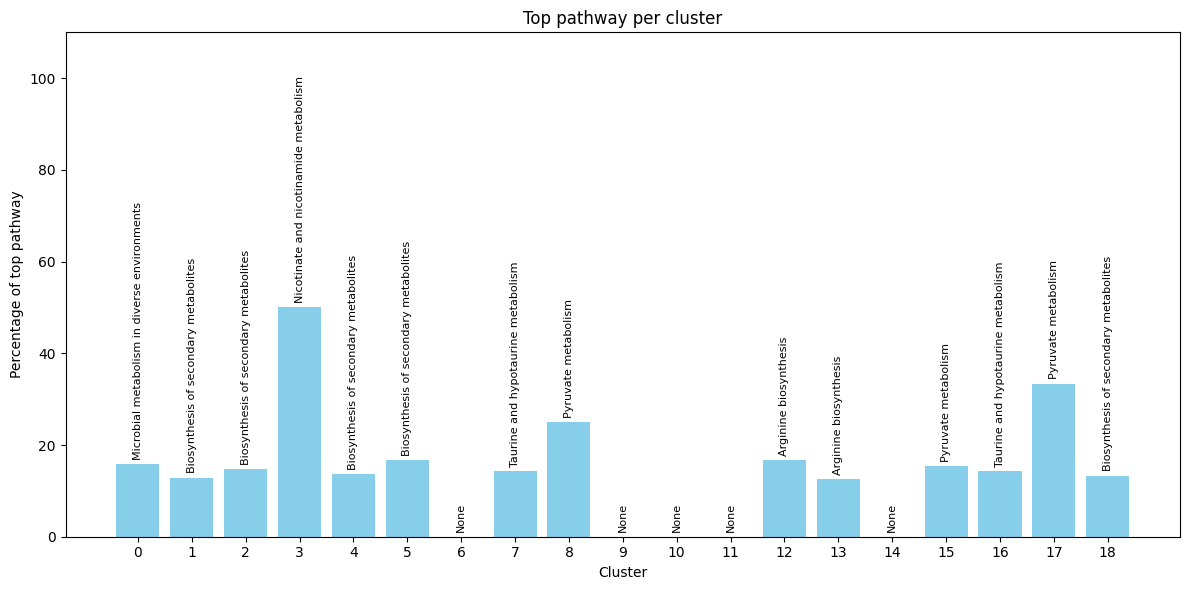

In [18]:

from collections import Counter, defaultdict

# Build mapping from reaction to its pathways
reaction_pathway_map = dict(zip(df['model_reaction'], df['pathways']))

# For each cluster, count how many reactions belong to each pathway
cluster_pathway_counts = []
for cluster in clusters:
    counter = Counter()
    for rxn in cluster:
        for pathway in reaction_pathway_map.get(rxn, []):
            counter[pathway] += 1
    total = sum(counter.values())
    percentages = {k: (v / total * 100) for k, v in counter.items()} if total > 0 else {}
    cluster_pathway_counts.append(percentages)
    

print(cluster_pathway_counts)
cluster_pathway_counts = [{k: v for k, v in d.items() if k != "Metabolic pathways"} for d in cluster_pathway_counts]


top_pathways = []
for i, pct_dict in enumerate(cluster_pathway_counts):
    if pct_dict:
        top_pathway = max(pct_dict.items(), key=lambda x: x[1])
        top_pathways.append({'Cluster': i, 'Pathway': top_pathway[0], 'Percentage': top_pathway[1]})
    else:
        top_pathways.append({'Cluster': i, 'Pathway': 'None', 'Percentage': 0})
        
summary_df = pd.DataFrame(top_pathways)



# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(summary_df['Cluster'], summary_df['Percentage'], color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Percentage of top pathway')
plt.title('Top pathway per cluster')

# Add pathway labels above bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             summary_df['Pathway'].iloc[i],
             ha='center', va='bottom', rotation=90, fontsize=8)

plt.xticks(summary_df['Cluster'])
plt.ylim(0, 110)
plt.tight_layout()
plt.show()
